In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Map Fucntion

In [5]:
df['mainroad'] = df['mainroad'].map({"yes" : 1, "no" : 0})
df['guestroom'] = df['guestroom'].map({"yes" : 1, "no" : 0})
df['basement'] = df['basement'].map({"yes" : 1, "no" : 0})
df['hotwaterheating'] = df['hotwaterheating'].map({"yes" : 1, "no" : 0})
df['airconditioning'] = df['airconditioning'].map({"yes" : 1, "no" : 0})
df['prefarea'] = df['prefarea'].map({"yes" : 1, "no" : 0})

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
print(df.dtypes)


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object


In [8]:
print(df['furnishingstatus'].unique())

['furnished' 'semi-furnished' 'unfurnished']


# Get dummies

In [9]:
df['furnishingstatus'] = df['furnishingstatus'].str.strip().str.lower()

In [10]:
df_encoded = pd.get_dummies(df, columns=['furnishingstatus'])

In [11]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


In [12]:
df_encoded = df_encoded.astype(int)

In [13]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [14]:
housing = df_encoded.drop('furnishingstatus_furnished', axis =1)

In [15]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### Creating new variable

In [16]:
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [17]:
housing['bbration'] = housing['bathrooms']/housing['bedrooms']

In [18]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,areaperbedroom,bbration
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


## Rescaling Features

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
housing_Norm = scaler.fit_transform(housing)

In [21]:
hn=pd.DataFrame(housing_Norm, columns=housing.columns)
hn.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,areaperbedroom,bbration
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [22]:
print(hn.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished', 'areaperbedroom', 'bbration'],
      dtype='object')


## Spliting data into train and test

In [23]:
X = hn.iloc[:, 1:]
X.shape

(545, 15)

In [24]:
y = hn.iloc[:, 0]
y.shape

(545,)

In [25]:
y=y.values.reshape(545,1)


In [26]:
y.shape

(545, 1)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [29]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 15)
(109, 15)
(436, 1)
(109, 1)


## Model fitting

In [30]:
import statsmodels.api as sm   #for implementing multiple linear regression

#### adding a constant to the independent variables (for the intercept)


In [31]:
X_train = sm.add_constant(X_train)

In [32]:
lm_1 = sm.OLS(y_train, X_train).fit()

In [33]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     59.84
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           3.31e-94
Time:                        04:49:25   Log-Likelihood:                 425.58
No. Observations:                 436   AIC:                            -819.2
Df Residuals:                     420   BIC:                            -753.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Multicollieanrity

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
%matplotlib inline

In [36]:
corr = housing.corr()

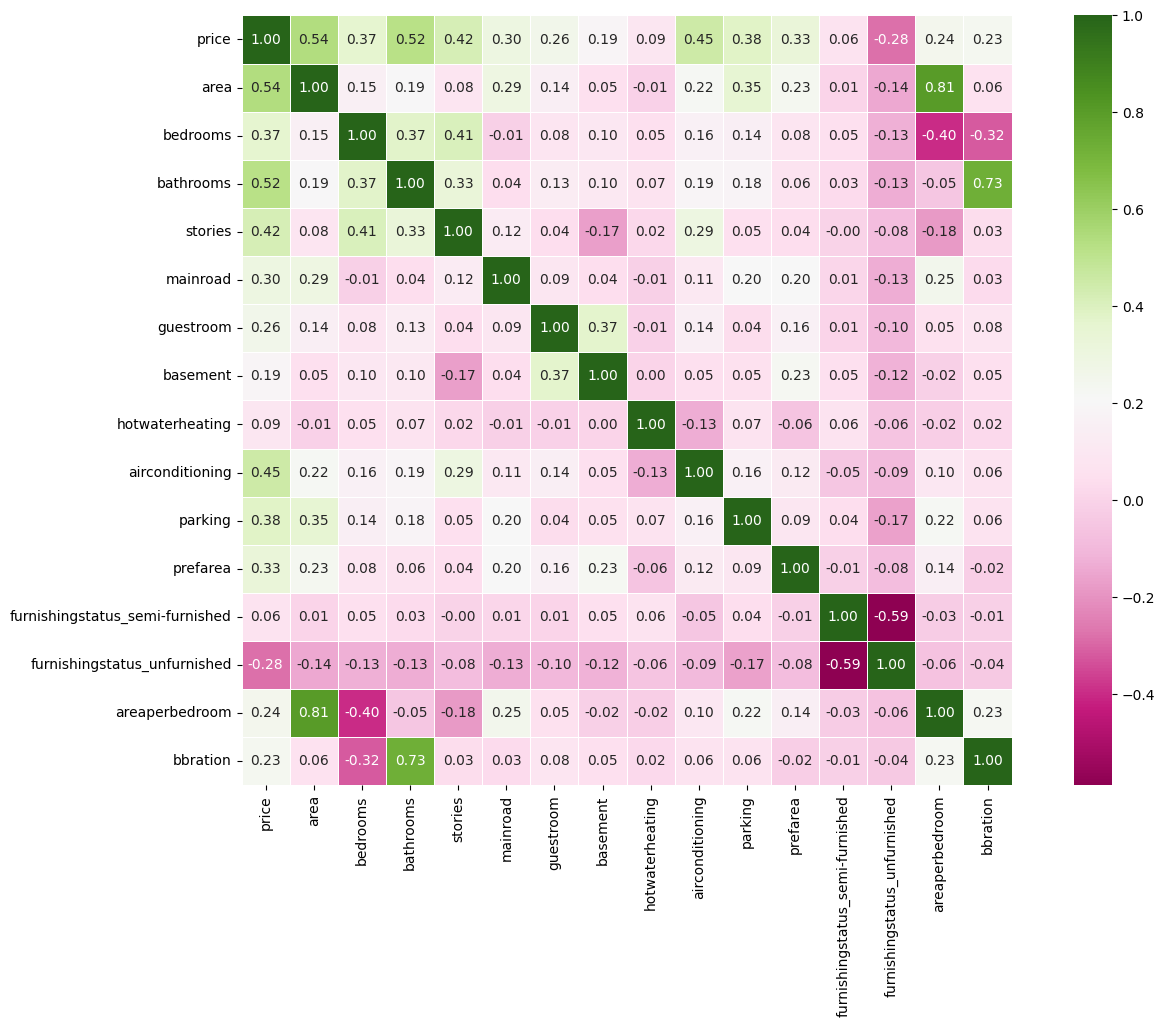

In [37]:
plt.figure(figsize = (16,10))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='PiYG', square=True, cbar=True, linewidths=.5)

plt.show()

## Checking VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
def vif_scores(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [40]:
vif_df = vif_scores(X).sort_values(by="VIF", ascending=False)

In [41]:
print(vif_df)

                            Feature        VIF
13                   areaperbedroom  68.707105
0                              area  57.516048
14                         bbration  29.249998
2                         bathrooms  11.106354
1                          bedrooms  10.683404
4                          mainroad   7.910522
3                           stories   2.805901
11  furnishingstatus_semi-furnished   2.614252
12     furnishingstatus_unfurnished   2.382862
6                          basement   2.045854
9                           parking   2.007955
8                   airconditioning   1.768615
10                         prefarea   1.509807
5                         guestroom   1.492428
7                   hotwaterheating   1.097694


### Removing bbratio

In [42]:
X = X.drop('bbration', axis =1)

In [43]:
def vif_scores(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [44]:
vif_df = vif_scores(X).sort_values(by="VIF", ascending=False)

In [45]:
print(vif_df)

                            Feature        VIF
0                              area  20.716025
13                   areaperbedroom  18.437262
1                          bedrooms  10.026456
4                          mainroad   7.459237
3                           stories   2.783201
11  furnishingstatus_semi-furnished   2.484125
12     furnishingstatus_unfurnished   2.204838
6                          basement   2.027730
9                           parking   2.004052
8                   airconditioning   1.768236
2                         bathrooms   1.712298
10                         prefarea   1.509389
5                         guestroom   1.478756
7                   hotwaterheating   1.093564


### Droping Bedroom also

In [46]:
X = X.drop('bedrooms', axis =1)

In [47]:
def vif_scores(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [48]:
vif_df = vif_scores(X).sort_values(by="VIF", ascending=False)

In [49]:
print(vif_df)

                            Feature        VIF
0                              area  14.978857
12                   areaperbedroom  13.881473
3                          mainroad   6.099134
2                           stories   2.559555
10  furnishingstatus_semi-furnished   2.037729
8                           parking   1.999982
5                          basement   1.901473
7                   airconditioning   1.762488
11     furnishingstatus_unfurnished   1.722278
1                         bathrooms   1.692180
9                          prefarea   1.504964
4                         guestroom   1.475441
6                   hotwaterheating   1.087115


## Droping areaperbedroom

In [50]:
X = X.drop('areaperbedroom', axis =1)

In [51]:
def vif_scores(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [52]:
vif_df = vif_scores(X).sort_values(by="VIF", ascending=False)

In [53]:
print(vif_df)

                            Feature       VIF
3                          mainroad  5.513523
0                              area  4.427217
2                           stories  2.323144
10  furnishingstatus_semi-furnished  2.004738
8                           parking  1.987943
5                          basement  1.896942
7                   airconditioning  1.760737
11     furnishingstatus_unfurnished  1.652372
1                         bathrooms  1.619363
9                          prefarea  1.497335
4                         guestroom  1.474326
6                   hotwaterheating  1.086273


In [54]:
X = X.drop('furnishingstatus_semi-furnished', axis =1)

In [55]:
def vif_scores(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [56]:
vif_df = vif_scores(X).sort_values(by="VIF", ascending=False)

In [57]:
print(vif_df)

                         Feature       VIF
3                       mainroad  4.845386
0                           area  4.362200
2                        stories  2.301304
8                        parking  1.987700
5                       basement  1.860222
7                airconditioning  1.753933
1                      bathrooms  1.619286
9                       prefarea  1.490106
4                      guestroom  1.470984
10  furnishingstatus_unfurnished  1.341568
6                hotwaterheating  1.081743


## Droping Basement

In [58]:
X = X.drop('basement', axis =1)

In [59]:
def vif_scores(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [60]:
vif_df = vif_scores(X).sort_values(by="VIF", ascending=False)

In [61]:
print(vif_df)

                        Feature       VIF
3                      mainroad  4.583261
0                          area  4.362124
2                       stories  2.206626
7                       parking  1.986493
6               airconditioning  1.749777
1                     bathrooms  1.589915
8                      prefarea  1.442071
9  furnishingstatus_unfurnished  1.340895
4                     guestroom  1.291867
5               hotwaterheating  1.079947


## Model building

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 10)
(109, 10)
(436, 1)
(109, 1)


In [64]:
X_train = sm.add_constant(X_train)

In [65]:
lm_2 = sm.OLS(y_train, X_train).fit()

In [66]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     88.33
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           3.20e-97
Time:                        04:49:28   Log-Likelihood:                 447.74
No. Observations:                 436   AIC:                            -873.5
Df Residuals:                     425   BIC:                            -828.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [67]:
X_test_const = sm.add_constant(X_test) # Add the constant to X_test as well

In [68]:
y_pred = lm_2.predict(X_test_const)

## Model Evaluation

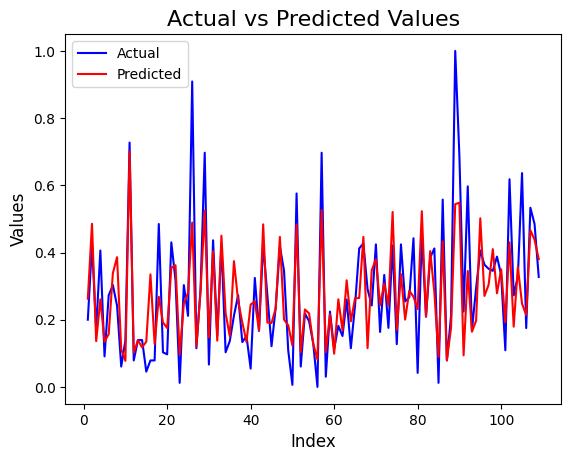

In [69]:
# Actual vs Predicted graph as below
c = [i for i in range(1,110,1)] #Create a range for x-axis (number of predictions)
fig = plt.figure()

plt.plot(c, y_test, label="Actual", color="blue")

plt.plot(c, y_pred, label="Predicted", color="red",)

# Plot heading
plt.title("Actual vs Predicted Values", fontsize=16)

# X-label
plt.xlabel("Index", fontsize=12)

# Y-label
plt.ylabel("Values", fontsize=12)

# Adding legend to differentiate Actual and Predicted
plt.legend()

# Show the plot
plt.show()

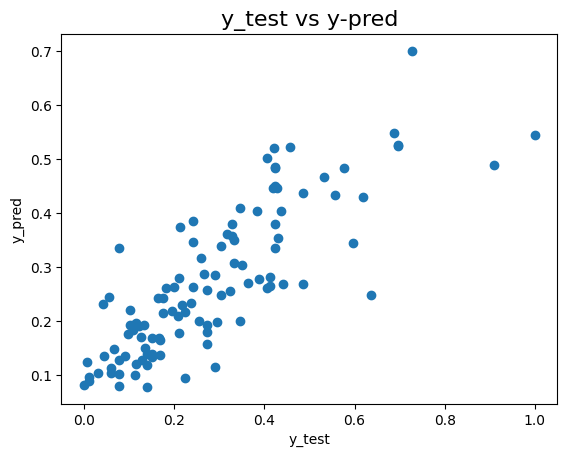

In [70]:
# Plotting y_test and y_pred scatter plot to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)

# Plot heading
plt.title('y_test vs y-pred', fontsize = 16)



# X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('y_pred')
plt.show()

In [71]:
print(y_test.shape)
print(y_pred.shape)

(109, 1)
(109,)


In [72]:
y_test = y_test.flatten()

In [73]:
error = y_test-y_pred

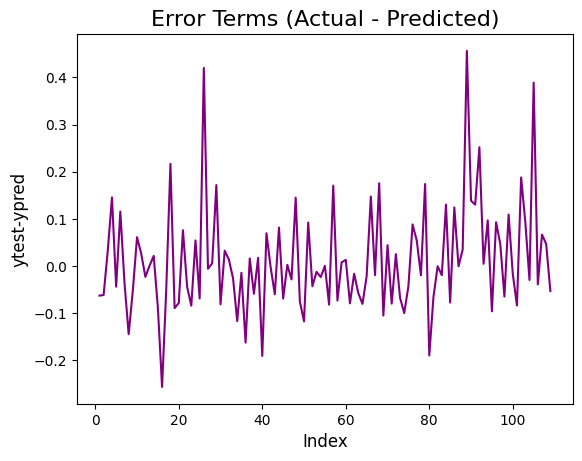

In [77]:
c = [i for i in range(1,110,1)]
# Plotting line chart of Error terms
fig = plt.figure()
plt.plot(c,error,color='purple')

# Plot heading
plt.title("Error Terms (Actual - Predicted)", fontsize=16)

# X-label (index)
plt.xlabel("Index", fontsize=12)

# Y-label (Error values)
plt.ylabel("ytest-ypred", fontsize=12)

# Show the plot
plt.show()

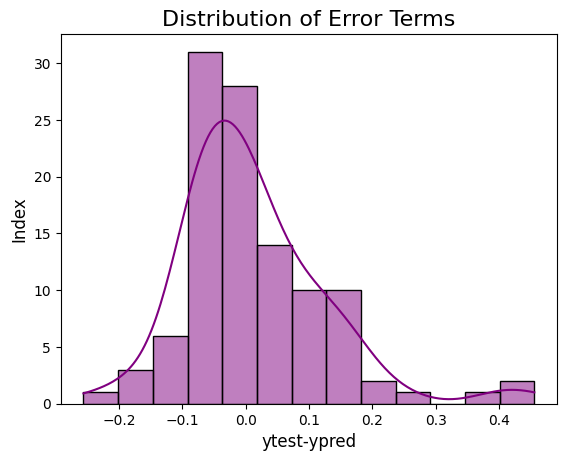

In [78]:
# Plotting the distribution of error terms
sns.histplot(error, kde=True, color='purple')

# Plot heading
plt.title("Distribution of Error Terms", fontsize=16)

# X-label
plt.xlabel("ytest-ypred", fontsize=12)

# Y-label
plt.ylabel("Index", fontsize=12)

# Show the plot
plt.show()

## Regression Metrics

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root mean square error: {rmse}")

Root mean square error: 0.11484226299569113


In [81]:
#mean square error
print(f"Mean square error: {mse}")

Mean square error: 0.01318874536997149


In [82]:
# mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error : {mae}")

Mean absolute error : 0.08221774939396223


# Feature Selection

In [115]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [116]:

model = LinearRegression()

rfe = RFE(model, n_features_to_select=6)

# Fitting and running RFE with X_train and y_train
rfe = rfe.fit(X_train, y_train)

print(rfe.ranking_)

#the selected features
col = X_train.columns[rfe.support_]
print("Selected Features:", col)

[6 1 1 1 5 3 2 1 1 1 4]
Selected Features: Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')


# Visualize data

In [117]:
housing_selected = housing[col]


In [118]:
housing_selected.shape

(545, 6)

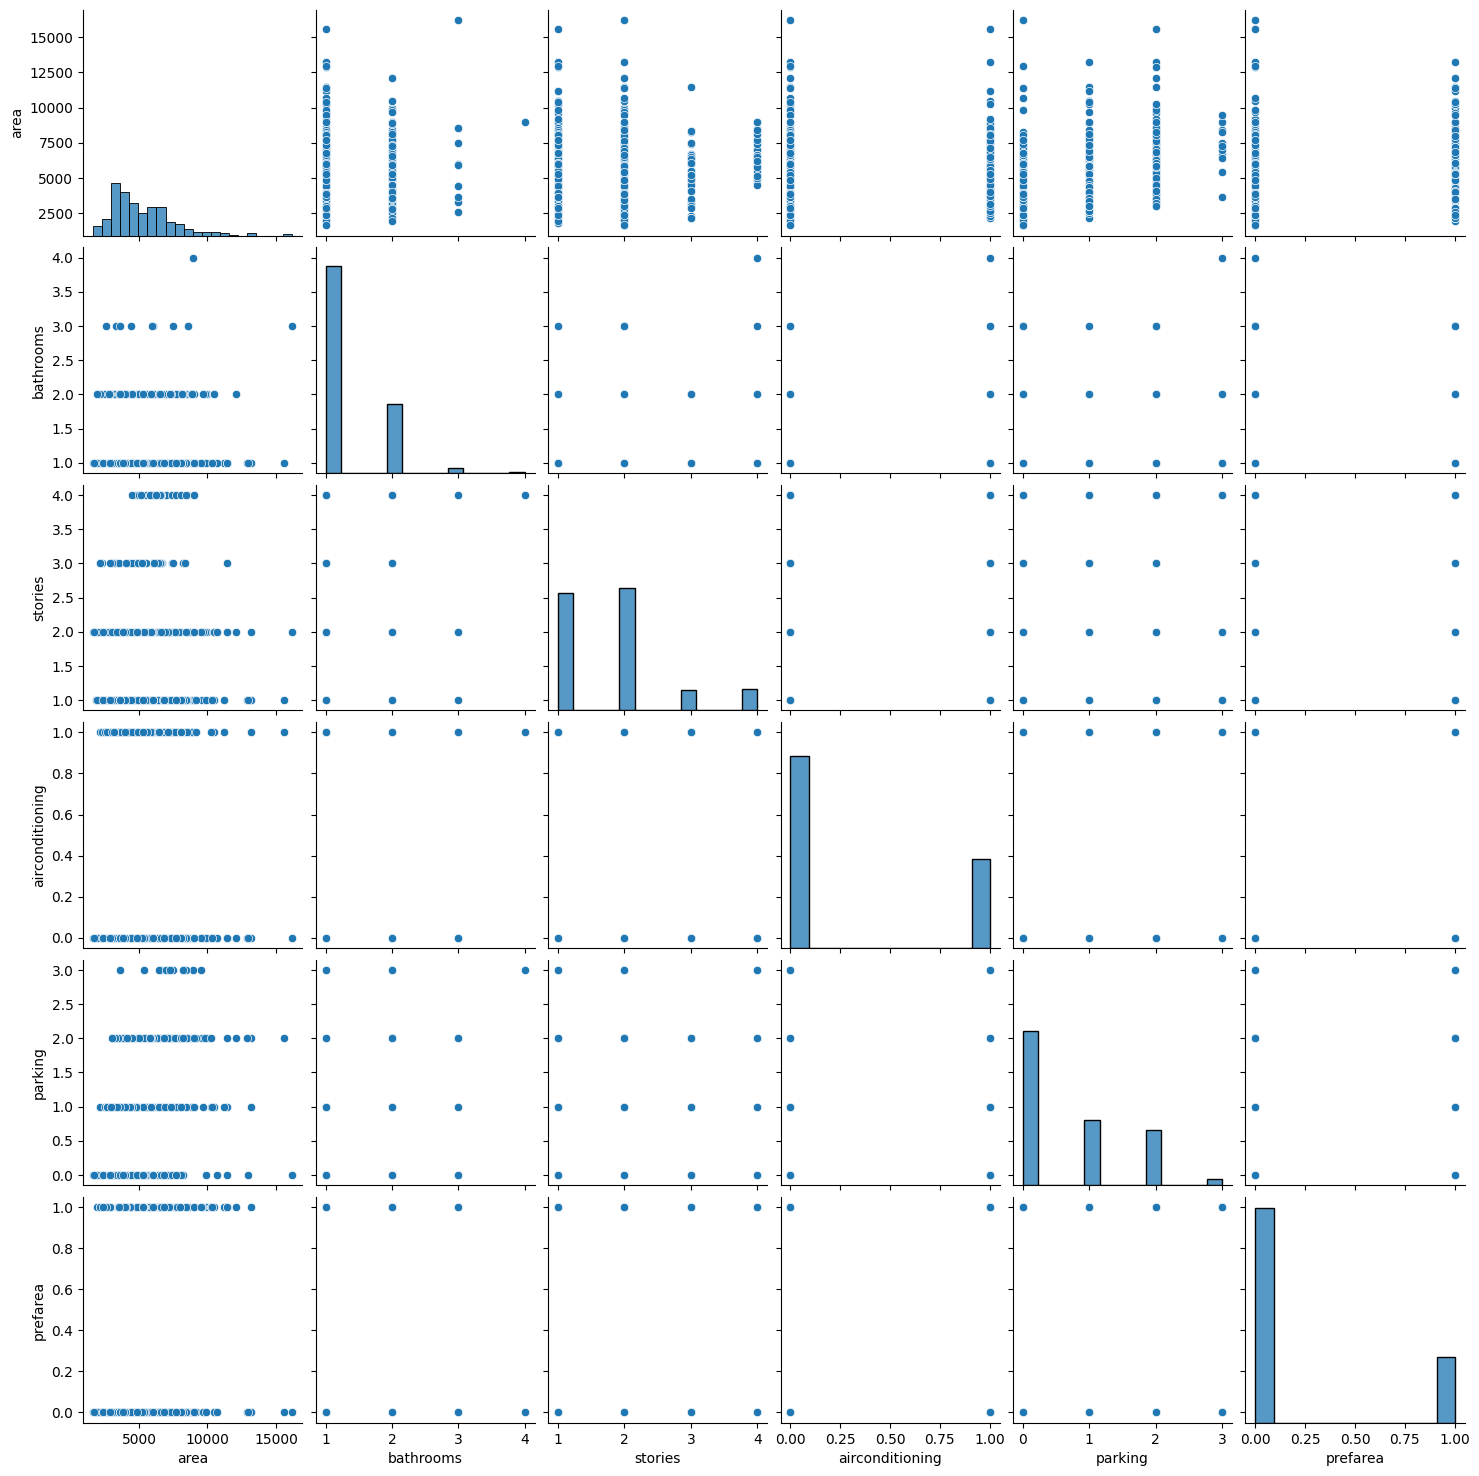

In [99]:
sns.pairplot(housing_selected)
plt.show()

In [121]:
y_1d = y.squeeze()

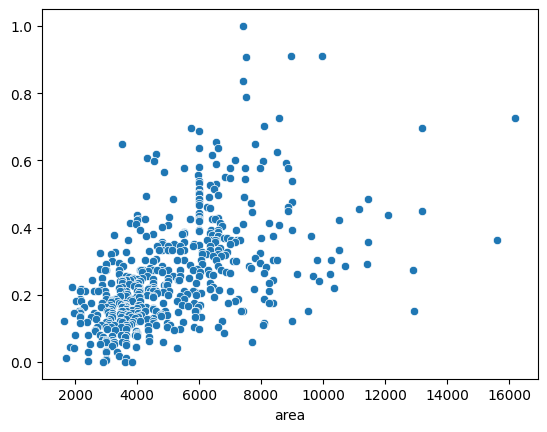

In [122]:
sns.scatterplot(x=housing_selected['area'], y= y_1d)
plt.show()

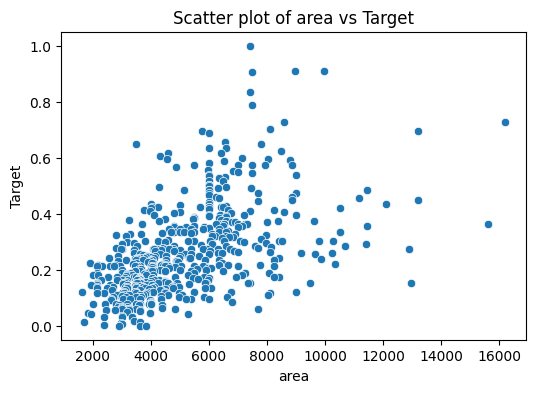

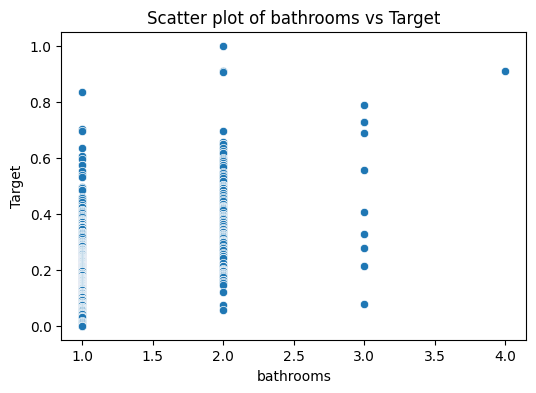

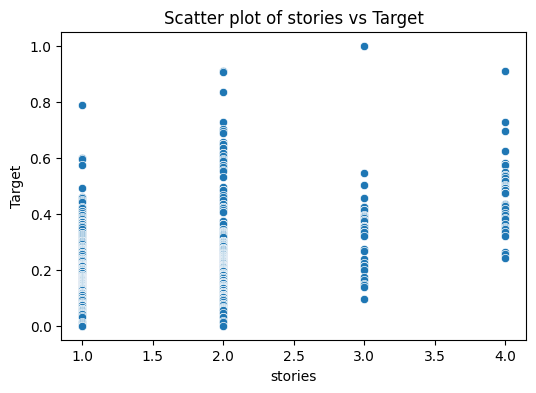

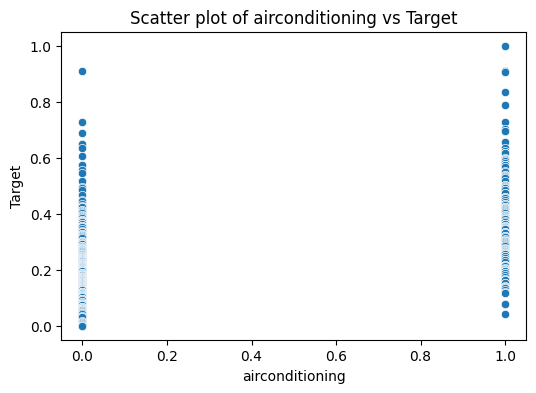

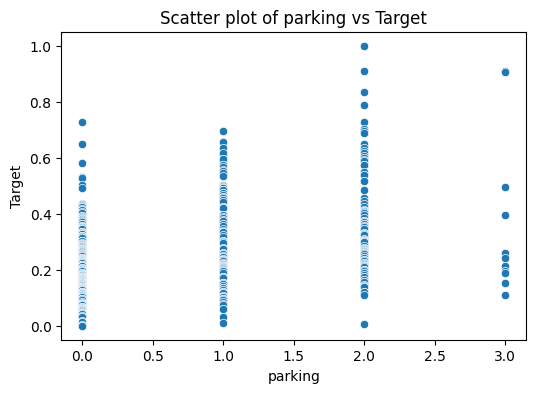

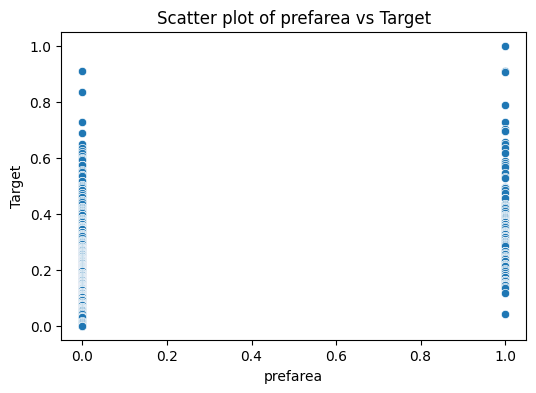

In [125]:
for feature in col:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=housing_selected[feature], y=y_1d)
    plt.title(f'Scatter plot of {feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.show()

## Building model again with selected features

In [126]:
housing_selected.shape

(545, 6)

In [127]:
y.shape

(545, 1)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(housing_selected, y, test_size=0.2, random_state=42)

In [130]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(436, 6)
(109, 6)
(436, 1)
(109, 1)


In [131]:
X_train = sm.add_constant(X_train)

In [132]:
lm_3 = sm.OLS(y_train, X_train).fit()

In [133]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     128.6
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.28e-92
Time:                        07:04:44   Log-Likelihood:                 427.00
No. Observations:                 436   AIC:                            -840.0
Df Residuals:                     429   BIC:                            -811.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1098      0.016     

In [137]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root mean square error: {rmse}")

Root mean square error: 0.11484226299569113
